In [1]:
# class 18 March 2019

## www.fuw.edu.pl/~polbrat

import numpy as np
from matplotlib import pyplot

In [ ]:
#
print("determined system")
A = np.array([[1.,2.],[3.,4.]])
y = np.array([5., 6.])
print(A)
print(y)
x = 
print()

In [20]:
# Próba rozwiązania układu sprzecznego - dążymy do otrzymania min błędu rozwiązania (wektor!)

print("\nOverdetermined system")
A = np.array([[1.,2.],[3.,4.],[5.,6.]])
y = np.array([10., -11., 12.])
print("A = ", A)
print("y = ", y)
x = np.linalg.solve(A.T @ A, A.T @ y)
print("x = ", x)

print("\nCalculate total square error")
err = np.linalg.norm(A @ x - y)**2
print("err = ", err)

print("\nSolve least squares in numpy")
x, *_ = np.linalg.lstsq(A, y, rcond=None)
print("x = ", x)


Overdetermined system
A =  [[1. 2.]
 [3. 4.]
 [5. 6.]]
y =  [ 10. -11.  12.]
x =  [-1.66666667  2.16666667]

Calculate total square error
err =  322.6666666666666

Solve least squares in numpy
x =  [-1.66666667  2.16666667]


In [34]:
# Układ nieoznaczony -> rozwiązanie MNK

# układy normalne ZAWSZE mają rozwiązanie; mają nieskończenie wiele rozwiązań
print("\nUnderdetermined system")
A = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([10., -11.])
print("A = ", A)
print("y = ", y)

#x = np.linalg.lstsq(A, y, rcond=None)
#print("x = ", x)

print("\nCompute matrix pseudoinverse")
U, S, V = np.linalg.svd(A)

# do submacierzy: od prawej: "dla osi 0, wklej 0. dla wiersza o indeksie 2"
P = V.T @ np.insert(np.diag(1./ S), 2, 0., 0) @ U.T
print("P = ", P)

print("\nSolve by matrix pseudoinverse")
x = P @ y
print("x =", x)

print("\nCalculate total square error")
err = np.linalg.norm(A @ x - y)**2
print(err)

print("\nCompute directly pseudoinverse in numpy")
P2 = np.linalg.pinv(A)
print("P = ", P2)

print("\nSolve least squares in numpy")
x2, *_ = np.linalg.lstsq(A, y, rcond=None)
print("x = ", x2)


Underdetermined system
A =  [[1. 2. 3.]
 [4. 5. 6.]]
y =  [ 10. -11.]

Compute matrix pseudoinverse
P =  [[-0.94444444  0.44444444]
 [-0.11111111  0.11111111]
 [ 0.72222222 -0.22222222]]

Solve by matrix pseudoinverse
x = [-14.33333333  -2.33333333   9.66666667]

Calculate total square error
2.0194839173657902e-28

Compute directly pseudoinverse in numpy
P =  [[-0.94444444  0.44444444]
 [-0.11111111  0.11111111]
 [ 0.72222222 -0.22222222]]

Solve least squares in numpy
x =  [-14.33333333  -2.33333333   9.66666667]


In [59]:
# Tikhonov regularization

print("\nTikhonov regularization")
A = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([10., -11.])
print("A = ", A)
print("y = ", y)

alpha = 0.001
x = np.linalg.solve(A.T @ A + alpha * np.identity(3), A.T @ y)
print("x = ", x, " with alpha = ", alpha)

alpha = 0.000001
x = np.linalg.solve(A.T @ A + alpha * np.identity(3), A.T @ y)
print("x = ", x, " with alpha = ", alpha)

alpha = 0.00000000001
x = np.linalg.solve(A.T @ A + alpha * np.identity(3), A.T @ y)
print("x = ", x, " with alpha = ", alpha)

alpha = 1e-14 # min value dla danego procesora(?) -> rozwiązanie w granicy alpha --> 0
x = np.linalg.solve(A.T @ A + alpha * np.identity(3), A.T @ y)
print("x = ", x, " with alpha = ", alpha)


Tikhonov regularization
A =  [[1. 2. 3.]
 [4. 5. 6.]]
y =  [ 10. -11.]
x =  [-14.30984795  -2.33005486   9.64973823]  with alpha =  0.001
x =  [-14.33330979  -2.33333008   9.66664973]  with alpha =  1e-06
x =  [-14.33090543  -2.33818914   9.66909457]  with alpha =  1e-11
x =  [-13.76470588  -3.47058824  10.23529412]  with alpha =  1e-14


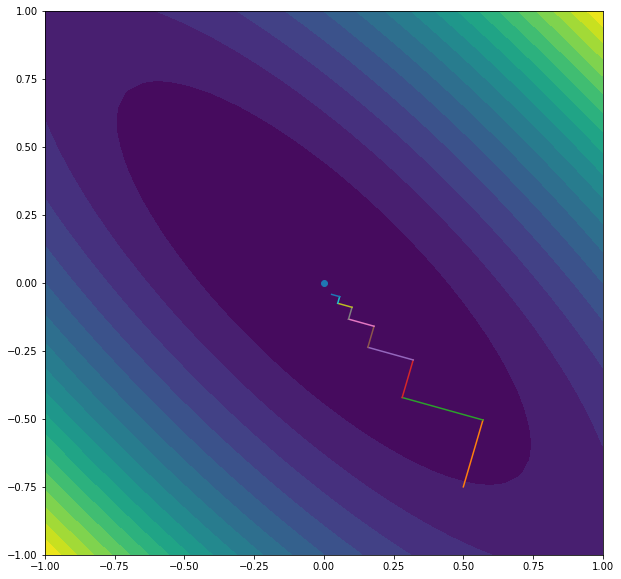

In [90]:
# Function minimization (from www.fuw.edu.pl/~polbrat/minimize.py file)

def bracket(getValue, point1, point2):
    gold = (1. + numpy.sqrt(5.)) / 2.
    value1, value2 = getValue(point1), getValue(point2)
    if value1 < value2:
        point1, point2 = point2, point1
        value1, value2 = value2, value1
    point3 = (1. + gold) * point2 - gold * point1
    value3 = getValue(point3)
    while value3 < value2:
        point1, point2 = point2, point3
        value1, value2 = value2, value3
        point3 = (1. + gold) * point2 - gold * point1
        value3 = getValue(point3)
    return point1, point2, point3

def section(getValue, point1, point2, point3):
    gold = (numpy.sqrt(5.) - 1.) / 2.
    value2 = getValue(point2)
    while 1.e-6 < numpy.linalg.norm(point1 - point3):
        if numpy.linalg.norm(point2 - point3) < numpy.linalg.norm(point1 - point2):
            point3, point1 = point1, point3
        point0 = gold * point2 + (1. - gold) * point3
        value0 = getValue(point0)
        if value0 < value2:
            point1, point2 = point2, point0
            value2 = value0
        else:
            point3 = point0
    return point2

def minimize(getValue, point, vector):
    return section(getValue, *bracket(getValue, point, point + vector))


# jak zrobić wykres formy kwadratowej
A = numpy.array([[5., 4.], [4., 5.]])

def getValue(point):
    return np.sum((point @ A) * point, axis= -1) /2.

def getGradient(point):
    return A @ point

def getHessian(point):
    return A
    
    
pyplot.figure(figsize = (10,10))

#x, y = numpy.meshgrid(numpy.linspace(-1., 1., 41), numpy.linspace(-1., 1., 41))
#pyplot.contourf(x, y, f(numpy.transpose(numpy.array([x, y]), (1, 2, 0))), 20)

abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

point0 = np.array([0.5, -0.75])
for index in range(10):
    point1 = minimize(getValue, point0, -getGradient(point0))
    pyplot.plot([point0[0], point1[0]], [point0[1], point1[1]])
    #pyplot.plot(point0[0], point0[1], lw=10, color="red")
    #pyplot.plot(point1[0], point1[1])
    point0 = point1
    
pyplot.show()



Steepest Descent - minimalizacja: `Klasyczna metoda gradientu`


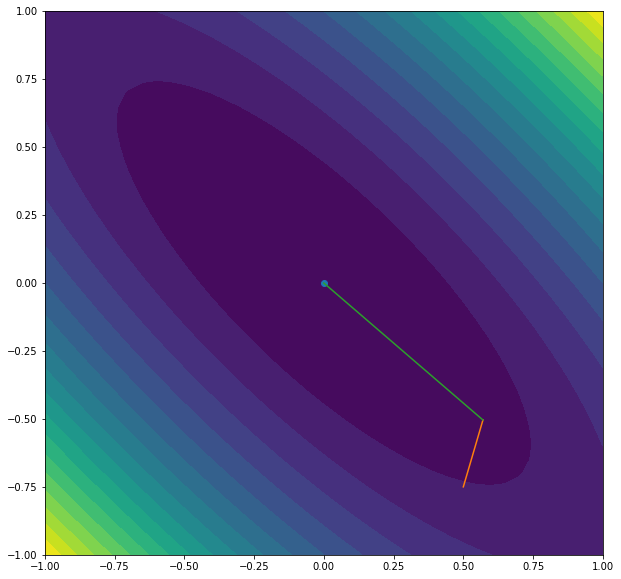

In [92]:
print("\nSteepest Descent - minimalizacja: `Klasyczna metoda gradientu`")

pyplot.figure(figsize = (10,10))

abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

# from PSEUDOCODE
x0 = np.array([0.5, -0.75]) # arbitrary point
g0 = getGradient(x0)        # gradient
c0 = g0                     # conjugate gradient

for index in range(10):
    x1 = minimize(getValue, x0, -c0)
    g1 = getGradient(x1)
    c1 = g1 + np.inner(g1, g1)/np.inner(g0, g0) * c0 # iloczyn skalarny dwóch wektorów == zwraca długość wektora
    pyplot.plot([x0[0], x1[0]], [x0[1], x1[1]])
    x0 = x1
    g0 = g1
    c0 = c1

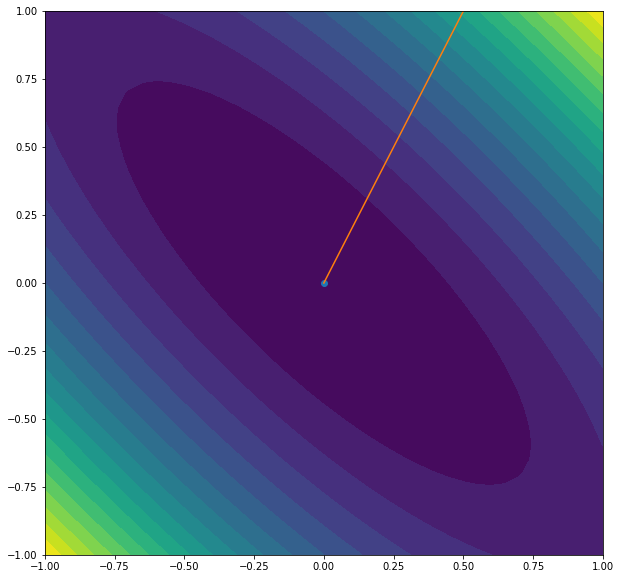

In [94]:
pyplot.figure(figsize = (10,10))

abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

point0 = np.array([0.5, 1.])
point1 = point0 - np.linalg.inv(getHessian(point0)) @ getGradient(point0)
pyplot.plot([point0[0], point1[0]], [point0[1], point1[1]])

pyplot.show()

[10.         0.1010101]


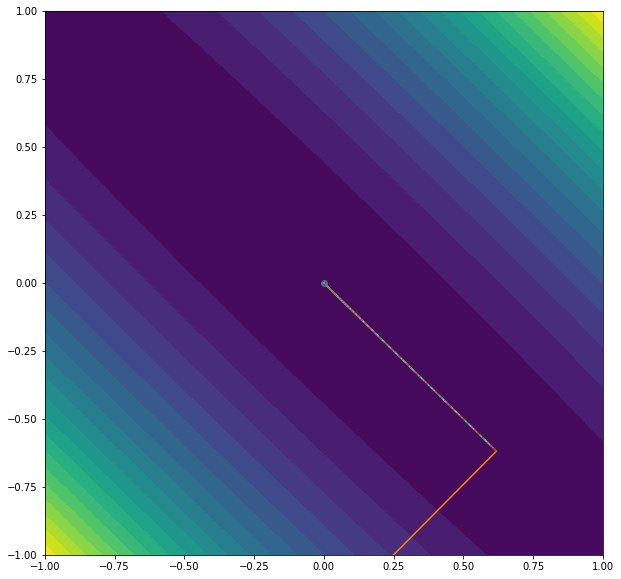

In [106]:
A = numpy.array([[5., 4.9], [4.9, 5.]])
values, vectors = np.linalg.eigh(A)
print(1./values) # współczynnik *****

pyplot.figure(figsize = (10,10))

# plot formy kwadratowej
abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

# dobieramy alpha i ilość kroków n
alpha = 0.1010101 # szybkość uczenia
n = 1000
point0 = np.array([0.25, -1.])
for index in range(n):
    point1 = point0 - alpha*getGradient(point0)
    pyplot.plot([point0[0], point1[0]], [point0[1], point1[1]])
    point0 = point1
pyplot.show()

[10.         0.1010101]


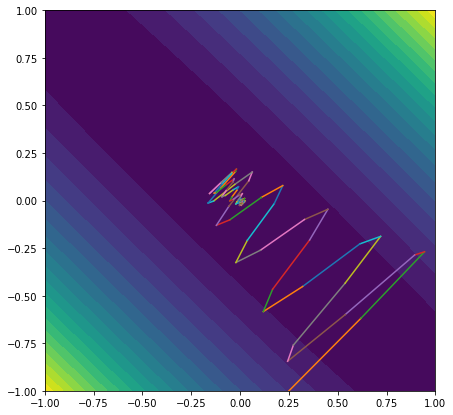

In [129]:
A = numpy.array([[5., 4.9], [4.9, 5.]])
values, vectors = np.linalg.eigh(A)
print(1./values) # współczynnik *****

pyplot.figure(figsize = (7,7))

# plot formy kwadratowej
abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

# wektor update'u
alpha = 0.1010101   # szybkość uczenia alpha=0.1010101
beta = 0.9         # rekomendowana beta=0.9
n = 100
x0 = np.array([0.25, -1.])
u0 = 0.
for index in range(n):
    u1 = beta*u0 - alpha*getGradient(x0)
    x1 = x0 + u1
    pyplot.plot([x0[0], x1[0]], [x0[1], x1[1]])
    x0 = x1
    u0 = u1
pyplot.show()

[10.         0.1010101]


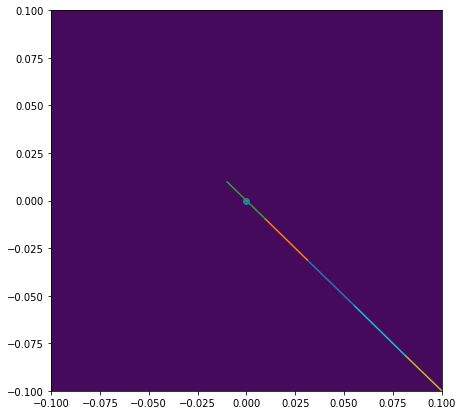

In [153]:
A = numpy.array([[5., 4.9], [4.9, 5.]])
values, vectors = np.linalg.eigh(A)
print(1./values) # współczynnik *****

pyplot.figure(figsize = (7,7))

# plot formy kwadratowej
abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

# wektor update'u - metoda Nesterov'a - "Nesterov Accelerated Gradient (NAG)"
alpha = 0.12   # szybkość uczenia alpha=0.1010101 odwrotność współczynnika /lipshica/
beta = 0.9         # rekomendowana beta=0.9
n = 22
x0 = np.array([0.25, -1.])
u0 = 0.
for index in range(n):
    u1 = beta*u0 - alpha*getGradient(x0 + beta*u0)
    x1 = x0 + u1
    pyplot.plot([x0[0], x1[0]], [x0[1], x1[1]])
    x0 = x1
    u0 = u1
    
pyplot.ylim(ymin=-0.1, ymax=0.1)
pyplot.xlim(xmin=-0.1, xmax=0.1)
pyplot.show()

[0.5  0.05]


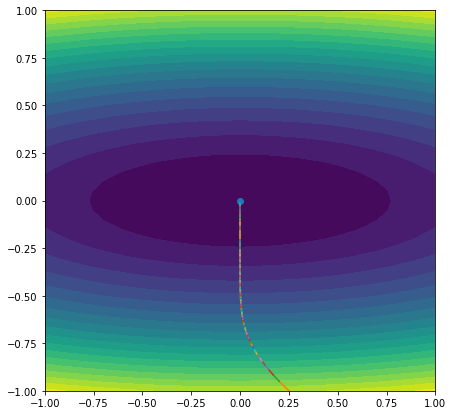

In [174]:
A = numpy.array([[2., 0.], [0., 20.]])
values, vectors = np.linalg.eigh(A)
print(1./values) # współczynnik *****

pyplot.figure(figsize = (7,7))

# plot formy kwadratowej
abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

# wektor update'u - metoda Nesterov'a - "Nesterov Accelerated Gradient (NAG)"
alpha = 0.05   # szybkość uczenia alpha=0.1010101 odwrotność współczynnika /lipshica/
epsilon = 10e-8 # rekomendowany 10e-8 - tiny number

n = 2400
x0 = np.array([0.25, -1.])
G0 = 0.
# or G = 0.
for index in range(n):
    g = getGradient(x0)
    G1 = G0 + g*g
    #G += g0*g0
    x1 = x0 - alpha/((epsilon + G1)**0.5) * g
    
    pyplot.plot([x0[0], x1[0]], [x0[1], x1[1]])
    x0 = x1
    G0 = G1
    
#pyplot.ylim(ymin=-0.1, ymax=0.1)
#pyplot.xlim(xmin=-0.1, xmax=0.1)
pyplot.show()

[0.5  0.05]


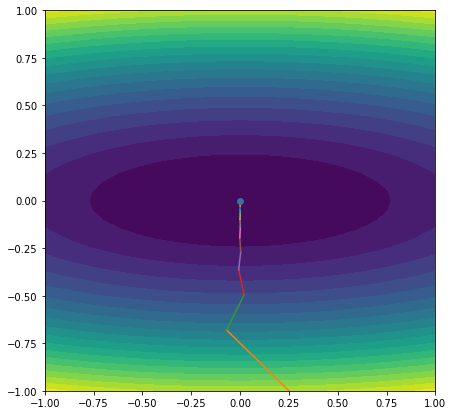

In [187]:
A = numpy.array([[2., 0.], [0., 20.]])
values, vectors = np.linalg.eigh(A)
print(1./values) # współczynnik *****

pyplot.figure(figsize = (7,7))

# plot formy kwadratowej
abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

# RMS Propagation
alpha = 0.1010101   # szybkość uczenia alpha=0.1010101 odwrotność współczynnika /lipshica/
epsilon = 10e-8 # rekomendowany 10e-8 - tiny number
beta = 0.9
n = 15
x0 = np.array([0.25, -1.])
G0 = 0.
for index in range(n):
    g = getGradient(x0)
    G1 = beta*G0 + (1-beta)*g*g
    x1 = x0 - alpha/((epsilon + G1)**0.5) * g
    
    pyplot.plot([x0[0], x1[0]], [x0[1], x1[1]])
    x0 = x1
    G0 = G1
    
#pyplot.ylim(ymin=-0.1, ymax=0.1)
#pyplot.xlim(xmin=-0.1, xmax=0.1)
pyplot.show()

[0.5  0.05]


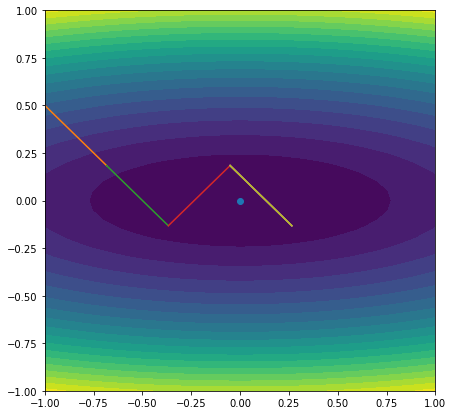

In [197]:
A = numpy.array([[2., 0.], [0., 20.]])
values, vectors = np.linalg.eigh(A)
print(1./values) # współczynnik *****

pyplot.figure(figsize = (7,7))

# plot formy kwadratowej
abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

# Adaptive Delta - AdaDelta
epsilon = 10e-8 # rekomendowany 10e-8 - tiny number
beta = 0.9
n = 8

x0 = np.array([-1., 0.5])
G0 = 0.
U0 = 0.01

for index in range(n):
    g = getGradient(x0)
    G1 = beta * G0 + (1. - beta) * g**2
    
    u = np.sqrt(U0/(epsilon + G1)) * g
    U1 = beta * U0 + (1. - beta) * u**2
    
    x1 = x0 - u
    
    pyplot.plot([x0[0], x1[0]], [x0[1], x1[1]])
    x0 = x1
    #G0 = G1
    #U0 = U1
    
#pyplot.ylim(ymin=-0.1, ymax=0.1)
#pyplot.xlim(xmin=-0.1, xmax=0.1)
pyplot.show()

## tu coś nie działa tak jak powinno  - sprawdzić z późniejszymi skryptami dr. P. Olbratowskiego

$$\begin{eqnarray}
x' &=& &x \sin\phi &+& z \cos\phi \\
z' &=& - &x \cos\phi &+& z \sin\phi \\
\end{eqnarray}$$

## 
$$\begin{align*}
& A \vec{x} = \vec{y} \\
& A = U \Sigma V^T \\
& A^{-1} = V \Sigma^{-1} U^{-1} \\
& || A \vec{x} - \vec{y} || = min  & \Rightarrow & &(A \vec{x} - \vec{y})^2 = min \\
& \frac{\partial}{\partial x} (A \vec{x} - \vec{y})^2 = 0 \\
\end{align*}$$

##### Równanie normalne - Rozwiązanie najmniejszych kwadratów 
$$\begin{align*}
& A^T A \vec{x} = A^T \vec{y} 
\end{align*}$$


$$\begin{align*}
A &= U \Sigma V^T \\
V \Sigma^T U^T U \Sigma V^T \vec{x} &= V \Sigma^T U^T \vec{y}  \qquad  U^T U = 1 \\
&\Sigma^T \Sigma V^T \vec{x} = \Sigma^T U^T \vec{y} \\
&\vec{X} = V^T \vec{x} \textrm{i} \vec{Y} = V^T \vec{y}\\ 
\end{align*}$$

Macierz V jest macierzą ortogonalną; ortogonalizacja nia zmienia długości wektora.
$$\begin{align*}
&\vec{X} = V^T \vec{x} \quad \Rightarrow \quad ||\vec{x}||^2 = min \quad \Rightarrow \quad ||\vec{X}||^2 = min \\
&\Sigma^T \Sigma  \vec{X} = \Sigma^T  \vec{Y} \\
&\sigma_i^2 X_i = \sigma_i Y_i
\end{align*}$$


$$\begin{align*}
\frac{Y_i}{\sigma_i} & \textrm{dla} \sigma_i \neq 0 \\
{0} & \textrm{dla} \sigma_i = 0 
\end{align*}$$


#### just example

\begin{equation*}
\frac{1}{\Bigl(\sqrt{\phi \sqrt{5}}-\phi\Bigr) e^{\frac25 \pi}} =
1+\frac{e^{-2\pi}} {1+\frac{e^{-4\pi}} {1+\frac{e^{-6\pi}}
{1+\frac{e^{-8\pi}} {1+\ldots} } } }
\end{equation*}

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

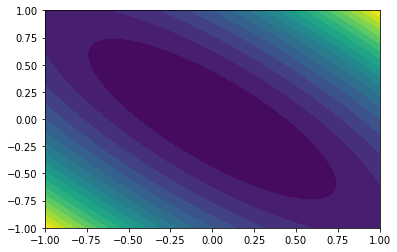

In [5]:
import numpy
from matplotlib import pyplot

def f(x, y):
    return 5. * x**2 + 8. * x * y + 5. * y**2

x, y = numpy.meshgrid(numpy.linspace(-1., 1., 41), numpy.linspace(-1., 1., 41))
pyplot.contourf(x, y, f(x, y), 20)

pyplot.show()

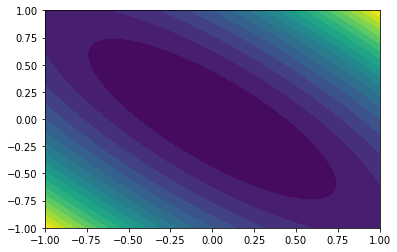

In [6]:
import numpy
from matplotlib import pyplot

A = numpy.array([[5., 4.], [4., 5.]])

def f(v):
    return numpy.sum((v @ A) * v, axis = -1)

x, y = numpy.meshgrid(numpy.linspace(-1., 1., 41), numpy.linspace(-1., 1., 41))
pyplot.contourf(x, y, f(numpy.transpose(numpy.array([x, y]), (1, 2, 0))), 20)

pyplot.show()

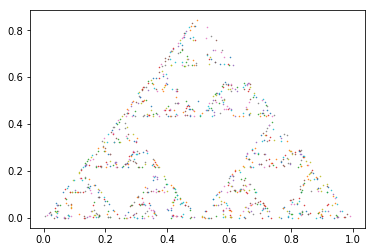

In [13]:
import numpy
from matplotlib import pyplot

s3 = numpy.sqrt(3.)
X = numpy.array([[0. / 1., 1. / 1., 1. / 2.],
                 [0. / 1., 0. / 1., s3 / 2.],
                 [1. / 1., 1. / 1., 1. / 1.]])
Y = [numpy.array([[0. / 1., 1. / 2., 1. / 4.],
                  [0. / 1., 0. / 1., s3 / 4.],
                  [1. / 1., 1. / 1., 1. / 1.]]),
     numpy.array([[1. / 2., 1. / 1., 3. / 4.],
                  [0. / 1., 0. / 1., s3 / 4.],
                  [1. / 1., 1. / 1., 1. / 1.]]),
     numpy.array([[1. / 4., 3. / 4., 1. / 2.],
                  [s3 / 4., s3 / 4., s3 / 2.],
                  [1. / 1., 1. / 1., 1. / 1.]])]

A = Y @ numpy.linalg.inv(X)

point = numpy.array([0.5, 0.5, 1.])
for index in range(1000):
    pyplot.plot(point[0], point[1], '.', markersize = 1)
    point = A[numpy.random.randint(3)] @ point

pyplot.show()

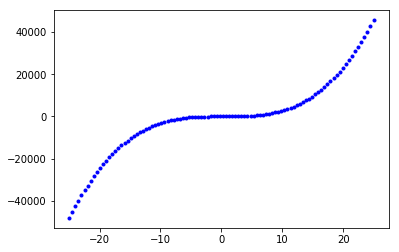

In [205]:
def f(x):
    return 3 * x**3 - 2 * x**2 - 3 * x + 1

x = np.linspace(-25,25,100)
pyplot.plot(x, f(x), "b.")
pyplot.show()

In [209]:
# zadanko
A = np.array([[1., 2.],
              [2., 1.]])

def getValue(point):
    return np.tensordot(point, A, ([-1.],[-1.]))

def getJacobian(point):
    return A

def getLoss(point):
    return (getValue(point)**2).sum(-1)

pyplot.figure(figsize = (7,7))

# plot formy kwadratowej
abscissa1, abscissa2 = np.meshgrid(np.linspace(-1., 1., 41), np.linspace(-1., 1., 41))
pyplot.contourf(abscissa1, abscissa2, getValue(np.transpose(np.array([abscissa1, abscissa2]), (1,2,0))), 20)
pyplot.plot(0, 0, "o")

# minimalizacja metodą Gaussa - Newtona
x0 = np.array([-1., 0.5])
value = getValue(x0)
jacobian = getJacobian(x0)

x1 = x0 - np.linalg(solve(jacobian.T @ jacobian, jacobian.T @ value))
pyplot.plot([x0[0], x1[0]], [x0[1], x1[1]])
pyplot.show()

# Metoda Levenberga-Marquardta:
#należy zastosować regularyzację Tihonova do metogu Gaussa-Newtona

TypeError: tuple indices must be integers or slices, not float

<Figure size 504x504 with 0 Axes>

680.0